In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wardabilal/student-stress-analysis")

print("Path to dataset files:", path)

/home/hitmonlee/Documents/5sem/dm2/all_pracs/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/hitmonlee/.cache/kagglehub/datasets/wardabilal/student-stress-analysis/versions/1


In [2]:
import pandas as pd

df = pd.read_csv("/home/hitmonlee/.cache/kagglehub/datasets/wardabilal/student-stress-analysis/versions/1/Student Stress Factors (2).csv")


In [3]:
from sklearn.cluster import AgglomerativeClustering

# Single Linkage

In [4]:
ag = AgglomerativeClustering(n_clusters=1,linkage="single")

complete_cl = ag.fit_predict(df)

set(complete_cl)

{np.int64(0)}

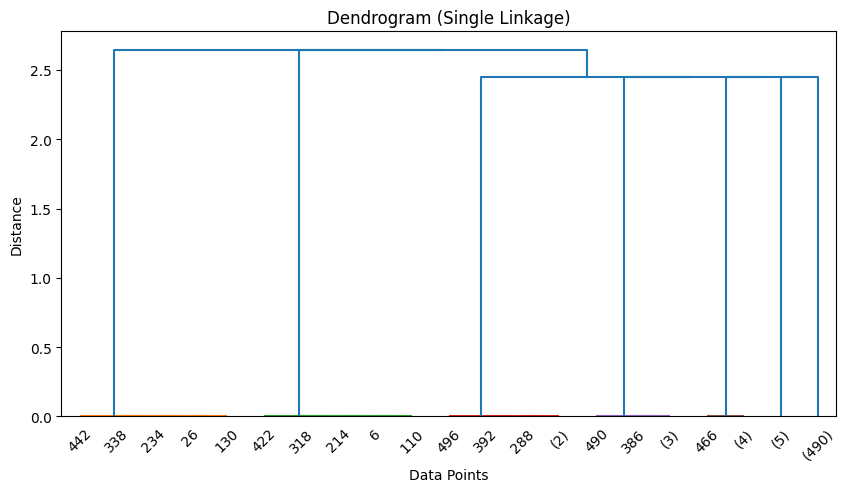

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(df)
plt.figure(figsize=(10,5))
dendrogram(Z,truncate_mode="level",p=5)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Complete Linkage 

In [6]:
ag = AgglomerativeClustering(n_clusters=1,linkage="complete")

complete_cl = ag.fit_predict(df)

set(complete_cl)

{np.int64(0)}

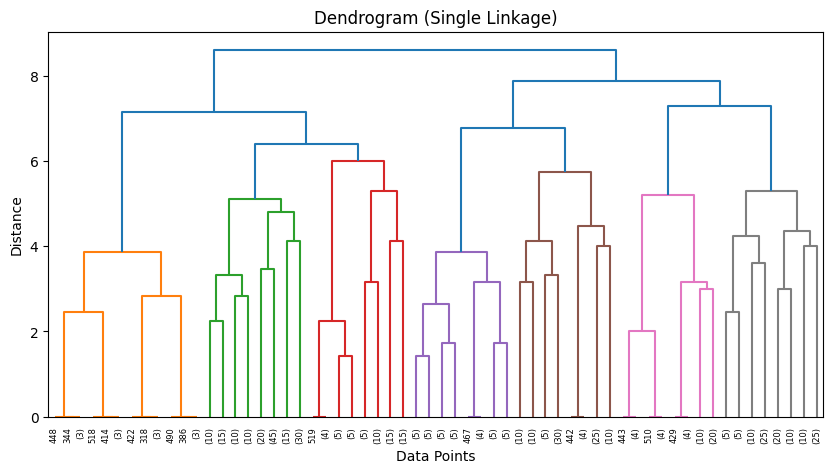

In [7]:
Z = linkage(df,method="complete")
plt.figure(figsize=(10,5))
dendrogram(Z,truncate_mode="level",p=5)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Density Based Clustering (DBSCAN)

### Chsosing Epsilon using K-dist curve

In [49]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples=1000,noise=0.05,random_state=45)

X.shape

(1000, 2)

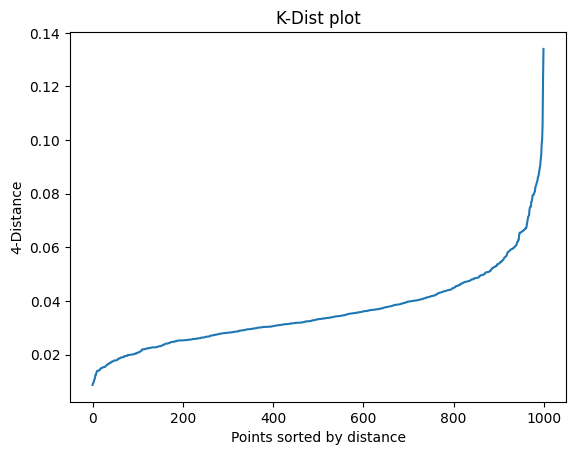

In [48]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

K = 4

nbrs = NearestNeighbors(n_neighbors=K)

nbrs.fit(X)

distances, indices = nbrs.kneighbors(X)

k_distances = distances[:,K-1]
k_distances = np.sort(k_distances)

plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{K}-Distance")
plt.title("K-Dist plot")
plt.show()

Text(0.5, 1.0, 'DBSCAN')

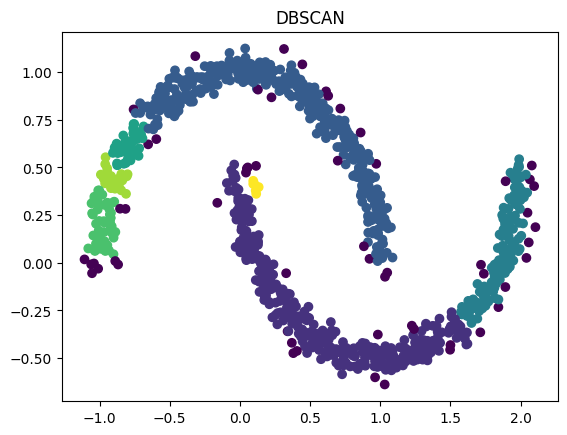

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=4,eps=0.05)

pred = dbscan.fit_predict(X)

plt.scatter(x=X[:,0],y=X[:,1],c=pred)
plt.title("DBSCAN")